In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#assign reading the csv file to the variable df_train
df_train = pd.read_csv('train.csv')

In [3]:
#show the columns of train (the file meant to train our machine learning algorithm)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#we'd like to get a vague idea of the general features of all the data we have so we can start with a little description of all variables
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#the ultimate goal of this entire project is to track the price of a house based on its features, so we use .describe to give us 
#stats about saleprice, our current goal to is show features about the data which this will help with
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
#now we can get an idea of what variables are numerical and which are categorical 
numrFeat = df_train.select_dtypes(include=[np.number])
catrFeat = df_train.select_dtypes(include=[np.object])
print('Numerical Features:\n',numrFeat.dtypes,'\n')
print('Numerical Features:\n',numrFeat.dtypes,'\n')

Numerical Features:
 Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object 

Numerical Fea

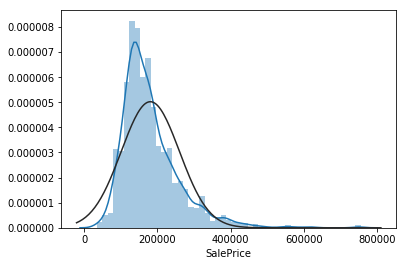

In [7]:
#to make this more digestable and give us an easier way to see the data and its features, we're going to use seaborn's distplot
#function which plots a graph to show the distribution of data, a histogram basically. 
sns.distplot(df_train['SalePrice'], fit=norm);

In [8]:
#here we're printing the skewness and kurtosis of the data. skew means it shows how far to the left or right of the
#center the peak is, while kurtosis shows the shape of the graph. a kurtosis of 3 means it's a smooth normal distribution
#a higher kurtosis gives sharp peaks and steep tails, with lower giving the opposite. 0 is the skewness for normal distribution
#with negative meaning its skewed left, positive skews right. skew and kurt are scipy functions
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness: 0.121335


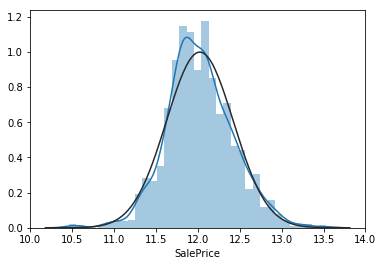

In [9]:
#to get a more normal distribution we can take the log and even it out
sns.distplot(np.log(df_train['SalePrice']), fit=norm);
print("Skewness: %f" % np.log(df_train['SalePrice']).skew())

In [10]:
#now that we know we can get saleprice to a normal distribution by getting its log, lets return to its original value for simplicity's sake
#in finding what values correlate with it heavily, e.g house size, as they will be focused by the machine learning algorithm
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [11]:
#we are now going to show salesprice's relationship with variables that are numerical (e.g their entries are just numbers)
print("NUMERICAL VARIABLE RELATIONSHIPS WITH SALESPRICE")

NUMERICAL VARIABLE RELATIONSHIPS WITH SALESPRICE


here are some pretty strong linear relationships we saw from our correlation list


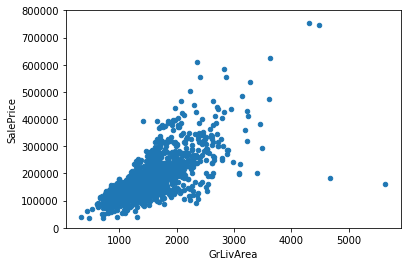

In [12]:
comparVar = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[comparVar]], axis=1) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html
data.plot.scatter(x=comparVar, y='SalePrice', ylim=(0,800000));
print('here are some pretty strong linear relationships we saw from our correlation list')
#this is how it's done with matlib but i prefer to use seaborn, which is why the graph will be repeated the next cell and all future graphs will be drawn using seaborn i just wanted to show how to do it with matlib

In [13]:
print('observed relationship is linear')

observed relationship is linear


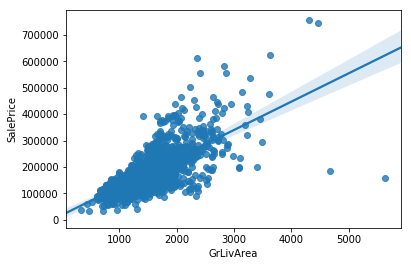

In [14]:
sns.regplot('GrLivArea','SalePrice',data=df_train);

to get a clearer idea of the relationship we can eliminate outliers by eyeballing it


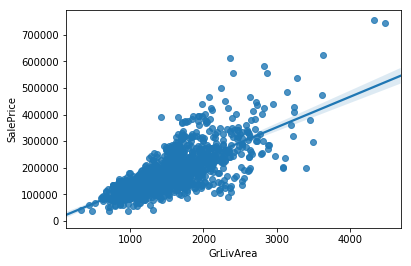

In [15]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
sns.regplot('GrLivArea','SalePrice',data=df_train);
print('to get a clearer idea of the relationship we can eliminate outliers by eyeballing it')

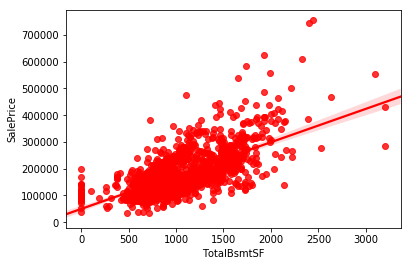

In [16]:
sns.regplot('TotalBsmtSF','SalePrice',data=df_train, color='red');


here we apply the same process to show some more linear relationships with saleprice


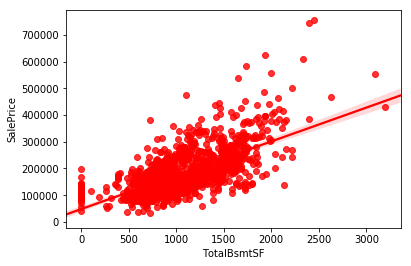

In [17]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>2500) & (df_train['SalePrice']<300000)].index)
sns.regplot('TotalBsmtSF','SalePrice',data=df_train, color='red');
print('here we apply the same process to show some more linear relationships with saleprice')

In [18]:
print('can be 0, it seems to have a dense, strong linear relationship at around 1000 on the x axis.')


can be 0, it seems to have a dense, strong linear relationship at around 1000 on the x axis.


here the anomalies have already been eliminated


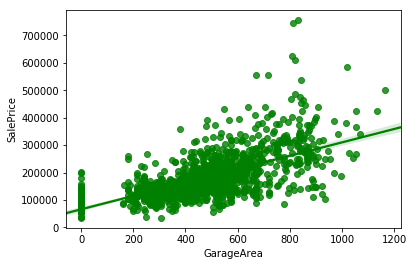

In [19]:
df_train = df_train[df_train['GarageArea']<1200]
sns.regplot('GarageArea','SalePrice',data=df_train,color='green');
print('here the anomalies have already been eliminated')

here an interesting concept can be shown, that by adding two variables together we can get a very strong correlation
note: the axis is the combination of '1stFlrSF' & '2ndFlrSF' 


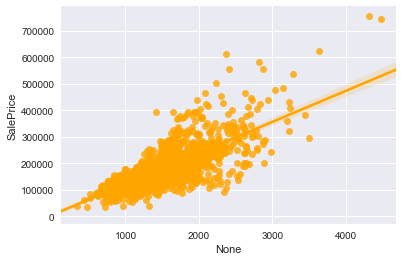

In [31]:
print('here an interesting concept can be shown, that by adding two variables together we can get a very strong correlation')
sns.regplot(df_train['1stFlrSF'] + df_train['2ndFlrSF'],df_train['SalePrice'], color='orange');
print("note: the axis is the combination of '1stFlrSF' & '2ndFlrSF' ")

In [21]:
#now we do a box plot for things that are categorical e.g the only values the variable can have are predetermined e.g housecolor 
#would only be red blue or green
print("CATEGORICAL VARIABLE RELATIONSHIPS WITH SALESPRICE")

CATEGORICAL VARIABLE RELATIONSHIPS WITH SALESPRICE


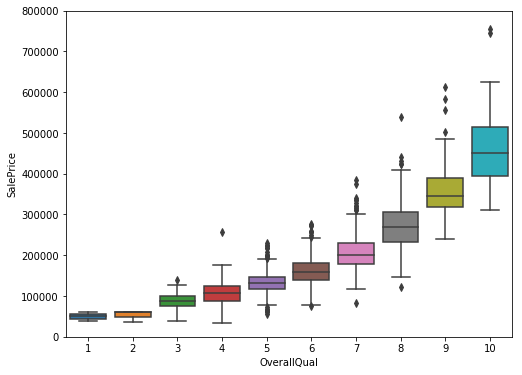

In [22]:
#this at a glance should be obvious that as overallqual goes up, so does salesprice, this is plotted via boxplot
comparVar = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[comparVar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=comparVar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000); #note: i might draw graphs with different functions just to show the capabilities of the different libraries in use

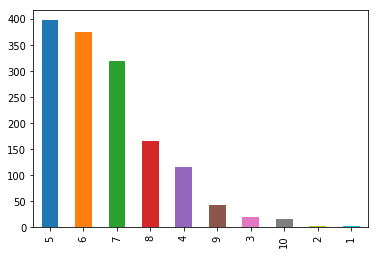

In [23]:
df_train['OverallQual'].value_counts().plot(kind="bar");

this shows the total rooms above ground, an issue arises as the sample size increases though


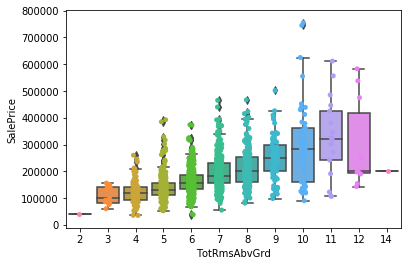

In [24]:
sns.boxplot(df_train['TotRmsAbvGrd'], df_train['SalePrice']);
sns.stripplot(df_train["TotRmsAbvGrd"],df_train["SalePrice"], jitter=True)
print('this shows the total rooms above ground, an issue arises as the sample size increases though')

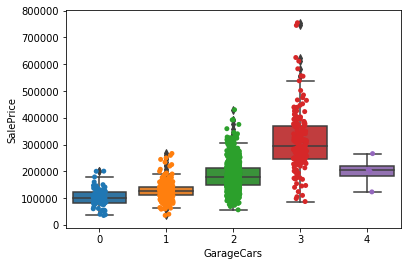

In [25]:
sns.boxplot(df_train['GarageCars'], df_train['SalePrice']);
sns.stripplot(df_train["GarageCars"],df_train["SalePrice"], jitter=True)

we need a bar graph to show why 4 gives us such an odd value for saleprice


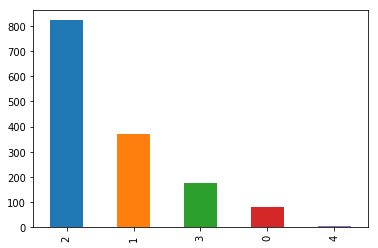

In [26]:
print('we need a bar graph to show why 4 gives us such an odd value for saleprice')
df_train['GarageCars'].value_counts().plot(kind="bar");

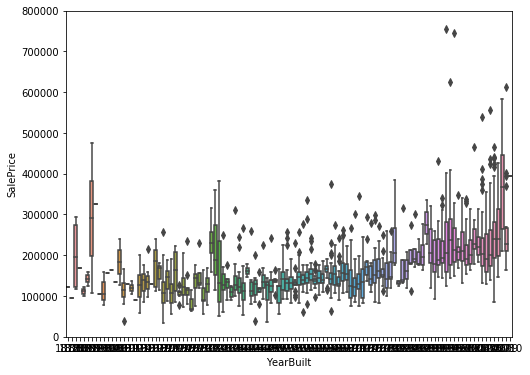

In [27]:
#now we're checking when the house was built
comparVar = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[comparVar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=comparVar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [28]:
print('its hard to determine the exact relationship but generally, the newer the more expensive')

its hard to determine the exact relationship but generally, the newer the more expensive


showing correlated variables and their relationships


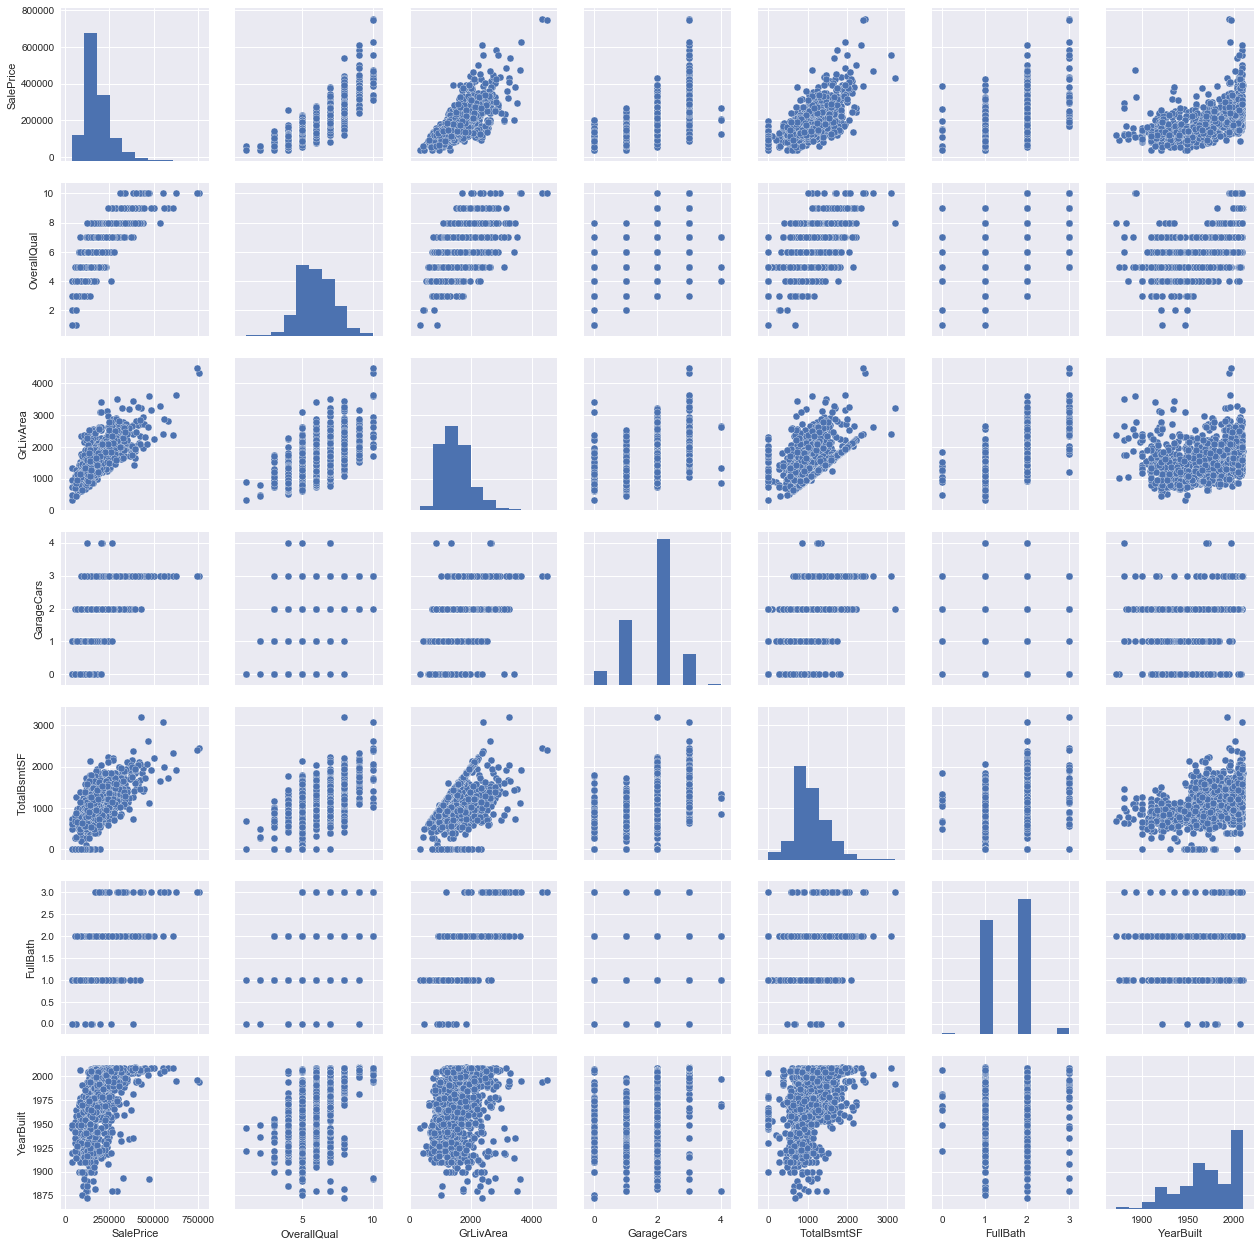

In [29]:
#okay this is a bit crazy, but it's essentially a grid of graphs
print('showing correlated variables and their relationships')
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();